In [1]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
from imblearn.over_sampling import SMOTE

# Loading the Dataset

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Titanic/titanic_train.csv")

# Exploratory Data Analysis 

In [4]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [5]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [6]:
# Checking the dimensions of the dataset.
df.shape

(891, 12)

In [7]:
# Checking types of columns
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
# Dropping Cabin and Ticket column.
df=df.drop(['Cabin', 'Ticket'], axis=1)

In [11]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

# Data Preprocessing

In [12]:
df =df.drop(["PassengerId", "Name"], axis=1)

In [13]:
# Filling missing values in the Age column.
df['Age'].fillna(df['Age'].median(), inplace=True)

In [14]:
# Filling missing values in the Embarked column.
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [15]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [16]:
from sklearn.preprocessing import LabelEncoder
lab_enc = LabelEncoder()

In [17]:
df['Sex'] = lab_enc.fit_transform(df['Sex'])
df['Embarked'] = lab_enc.fit_transform(df['Embarked'])

<Axes: >

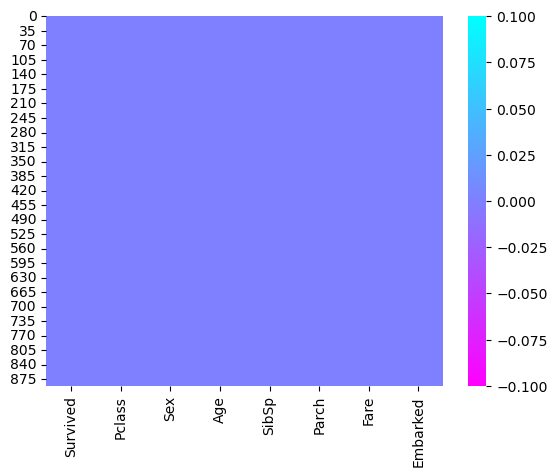

In [18]:
sns.heatmap(df.isnull(), cmap = "cool_r")

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [20]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
888,0,3,0,28.0,1,2,23.4500,2
889,1,1,1,26.0,0,0,30.0000,0


###### In Sex column  0 - Female, 1 - Male and in Embarked column C - 0 ,Q - 1  and S - 2.

# Description of Dataset

In [21]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.361582,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.019697,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


#### 1. Count of all the columns are same , there are no missing values.
#### 2. Mean is greater than median , right skewness possible.
#### 3. Between 75% and max differences can be seen, outliers present.

Survived
0    549
1    342
Name: count, dtype: int64


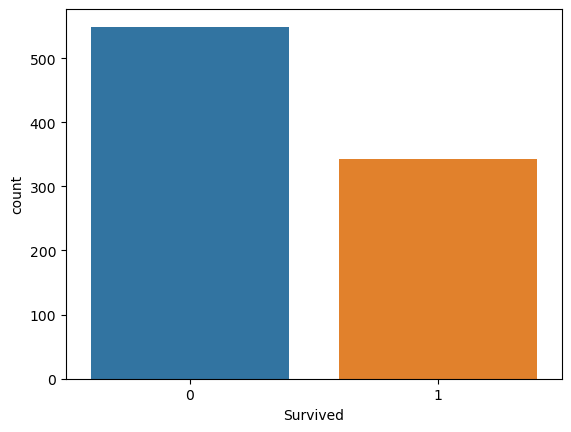

In [22]:
ax = sns.countplot(x = 'Survived', data = df)
print(df['Survived'].value_counts())

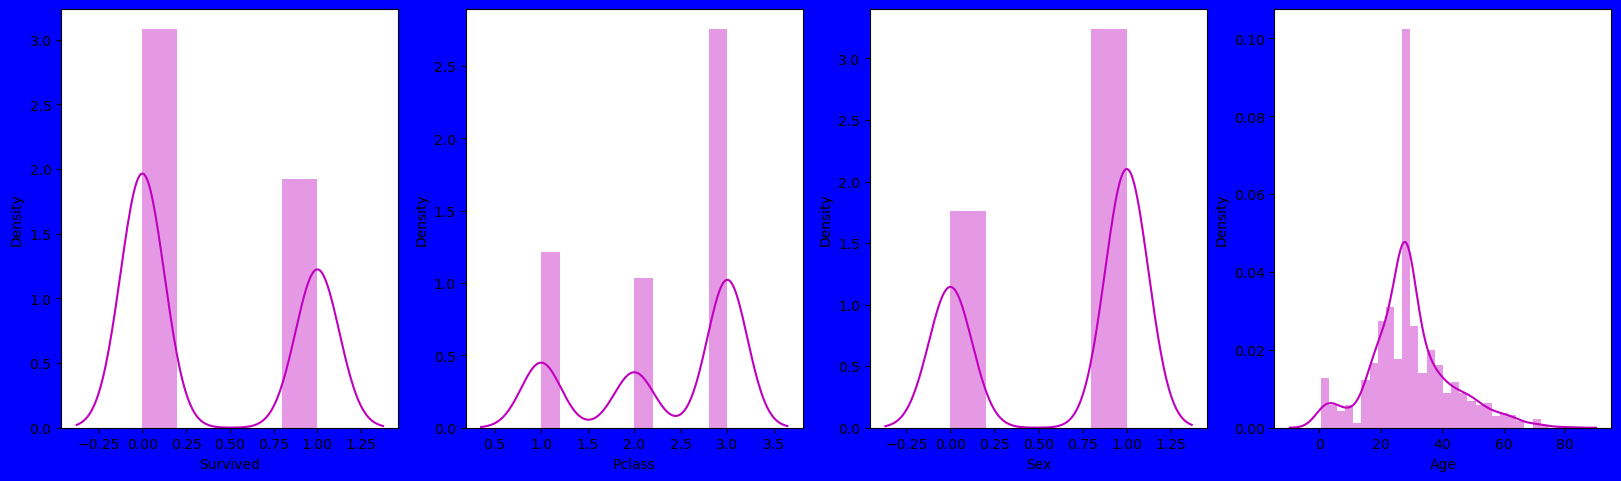

In [23]:
# Let's check how data has been distributed in columns.
plt.figure(figsize = (20, 25), facecolor = 'blue')
plotnumber = 1
for column in df:
    if plotnumber <= 4:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(df[column], color = 'm')
        plt.xlabel(column, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.show()    

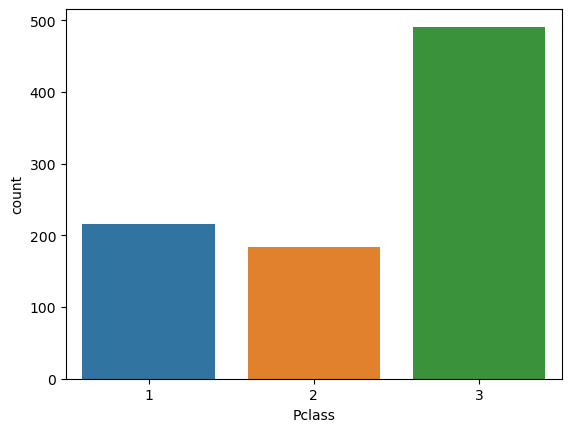

In [24]:
sns.countplot (x='Pclass', data = df)
plt.show()

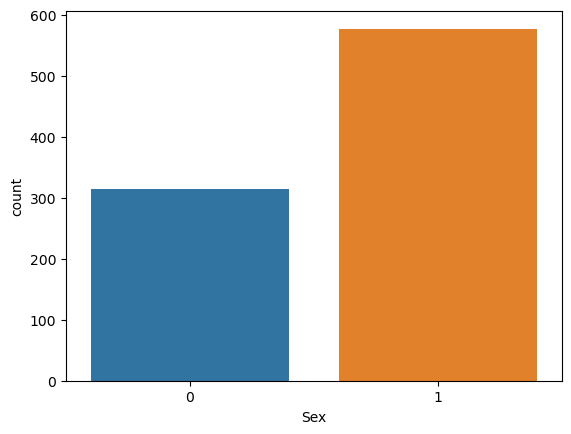

In [25]:
sns.countplot (x='Sex', data = df)
plt.show()

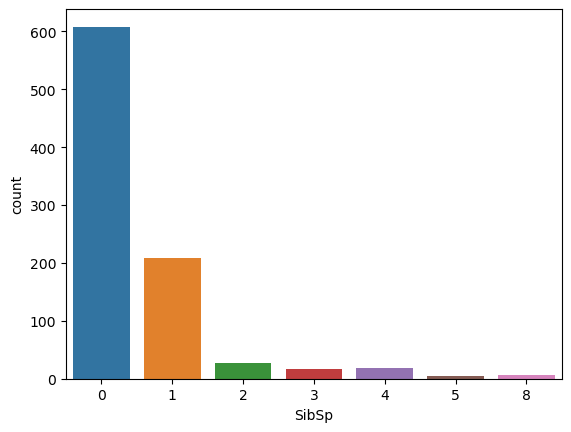

In [26]:
sns.countplot (x='SibSp', data = df)
plt.show()

## Checking Correlation  

In [27]:
cor = df.corr()
print(cor)

          Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived  1.000000 -0.338481 -0.543351 -0.064910 -0.035322  0.081629   
Pclass   -0.338481  1.000000  0.131900 -0.339898  0.083081  0.018443   
Sex      -0.543351  0.131900  1.000000  0.081163 -0.114631 -0.245489   
Age      -0.064910 -0.339898  0.081163  1.000000 -0.233296 -0.172482   
SibSp    -0.035322  0.083081 -0.114631 -0.233296  1.000000  0.414838   
Parch     0.081629  0.018443 -0.245489 -0.172482  0.414838  1.000000   
Fare      0.257307 -0.549500 -0.182333  0.096688  0.159651  0.216225   
Embarked -0.167675  0.162098  0.108262 -0.018754  0.068230  0.039798   

              Fare  Embarked  
Survived  0.257307 -0.167675  
Pclass   -0.549500  0.162098  
Sex      -0.182333  0.108262  
Age       0.096688 -0.018754  
SibSp     0.159651  0.068230  
Parch     0.216225  0.039798  
Fare      1.000000 -0.224719  
Embarked -0.224719  1.000000  


<Axes: >

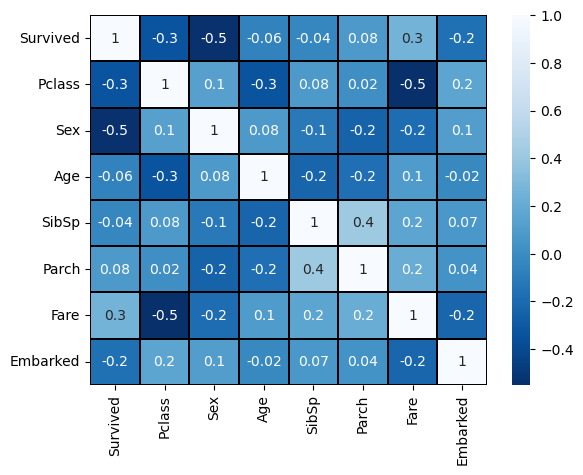

In [28]:
sns.heatmap(df.corr(),linewidth = 0.1, fmt = ".1g", linecolor = "black", annot = True, cmap = "Blues_r")

# Checking Outliers

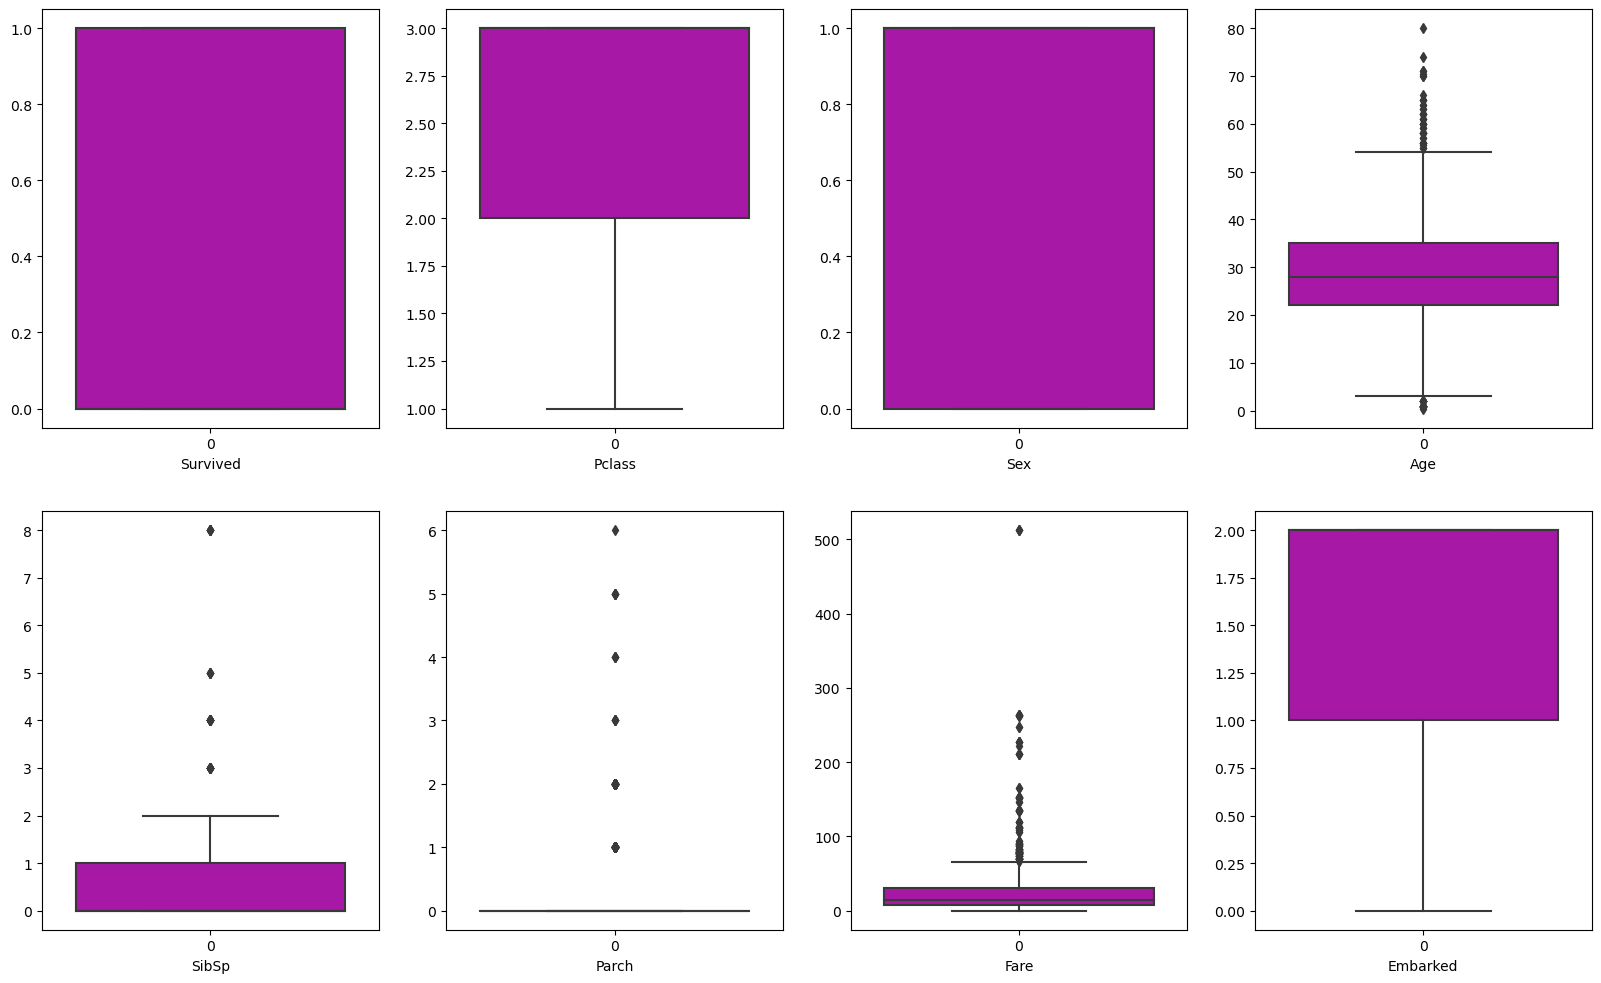

In [29]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(df[column], color = 'm')
        plt.xlabel(column, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.show()    

In [30]:
# Removing Outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z
threshold = 3
np.where(z<3)

(array([  0,   0,   0, ..., 890, 890, 890], dtype=int64),
 array([0, 1, 2, ..., 5, 6, 7], dtype=int64))

In [31]:
df=df[(z<3).all(axis = 1)]
df.shape

(820, 8)

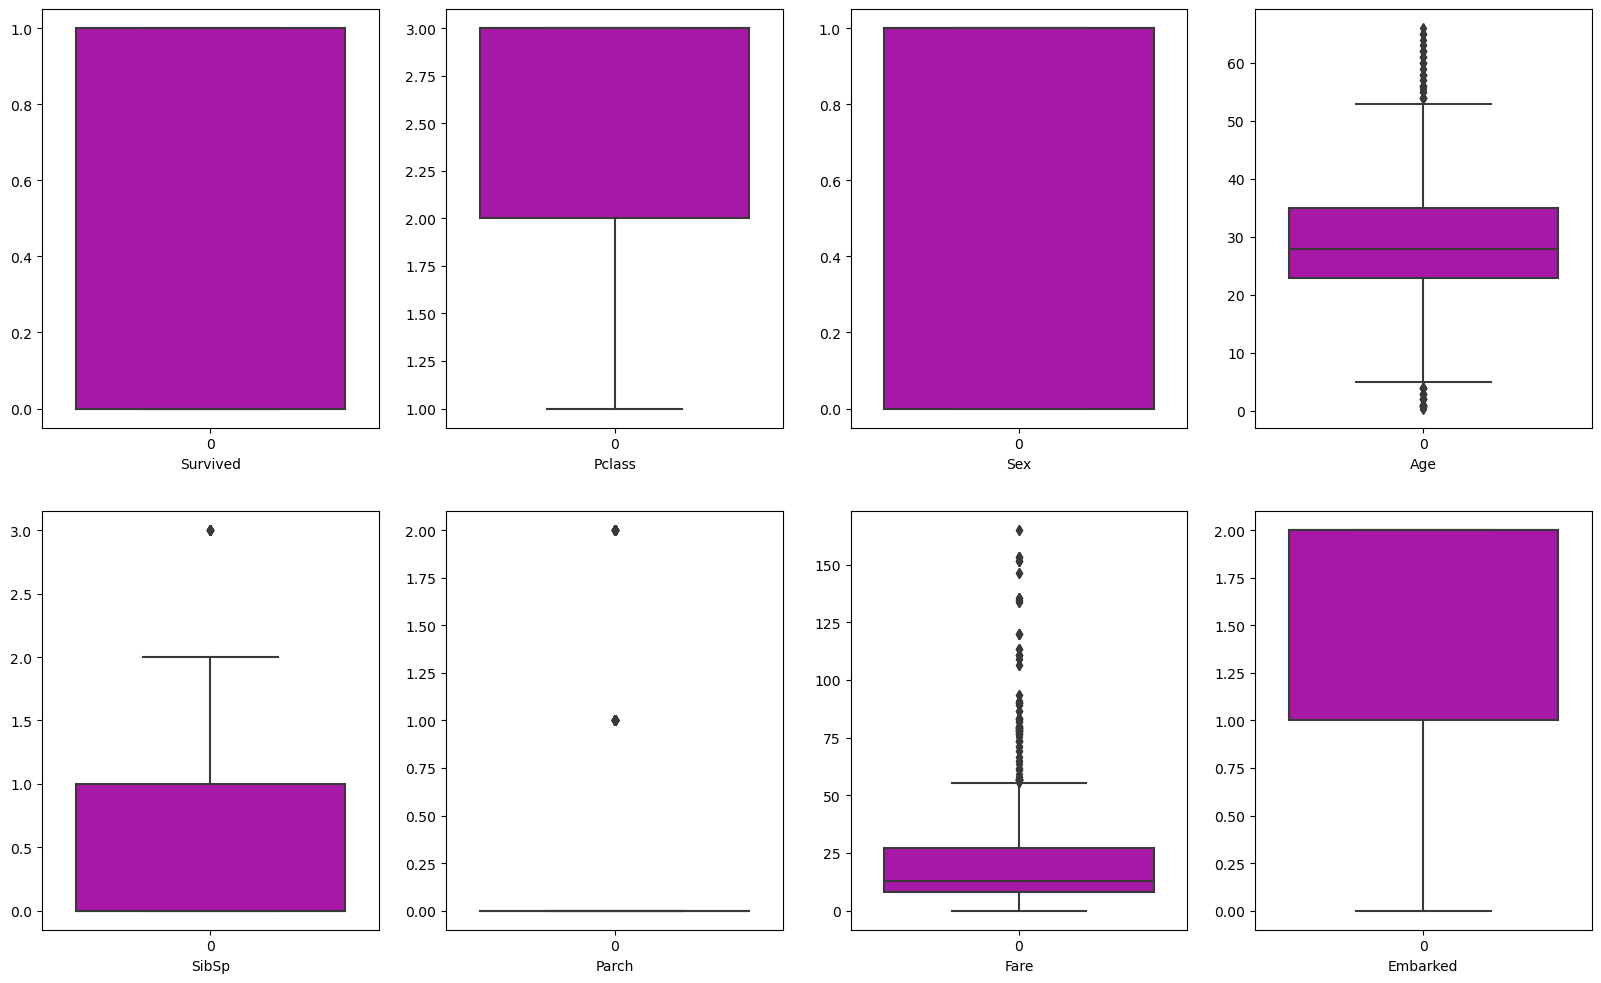

In [32]:
plt.figure(figsize = (20, 25), facecolor = 'white')
plotnumber = 1
for column in df:
    if plotnumber <= 8:
        ax = plt.subplot(4, 4, plotnumber)
        sns.boxplot(df[column], color = 'm')
        plt.xlabel(column, fontsize = 10)
        plt.yticks(rotation = 0, fontsize = 10)
    plotnumber += 1
plt.show()    

In [33]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        2.318761
Embarked   -1.277386
dtype: float64

In [35]:
df['Fare'] = np.log(df['Fare'] +1)

In [36]:
df.skew()

Survived    0.450825
Pclass     -0.632242
Sex        -0.664152
Age         0.401952
SibSp       1.979577
Parch       2.122629
Fare        0.196364
Embarked   -1.277386
dtype: float64

In [37]:
# Dividing dataset into features and label
y = df['Survived']
x = df.drop(columns = ['Survived'])

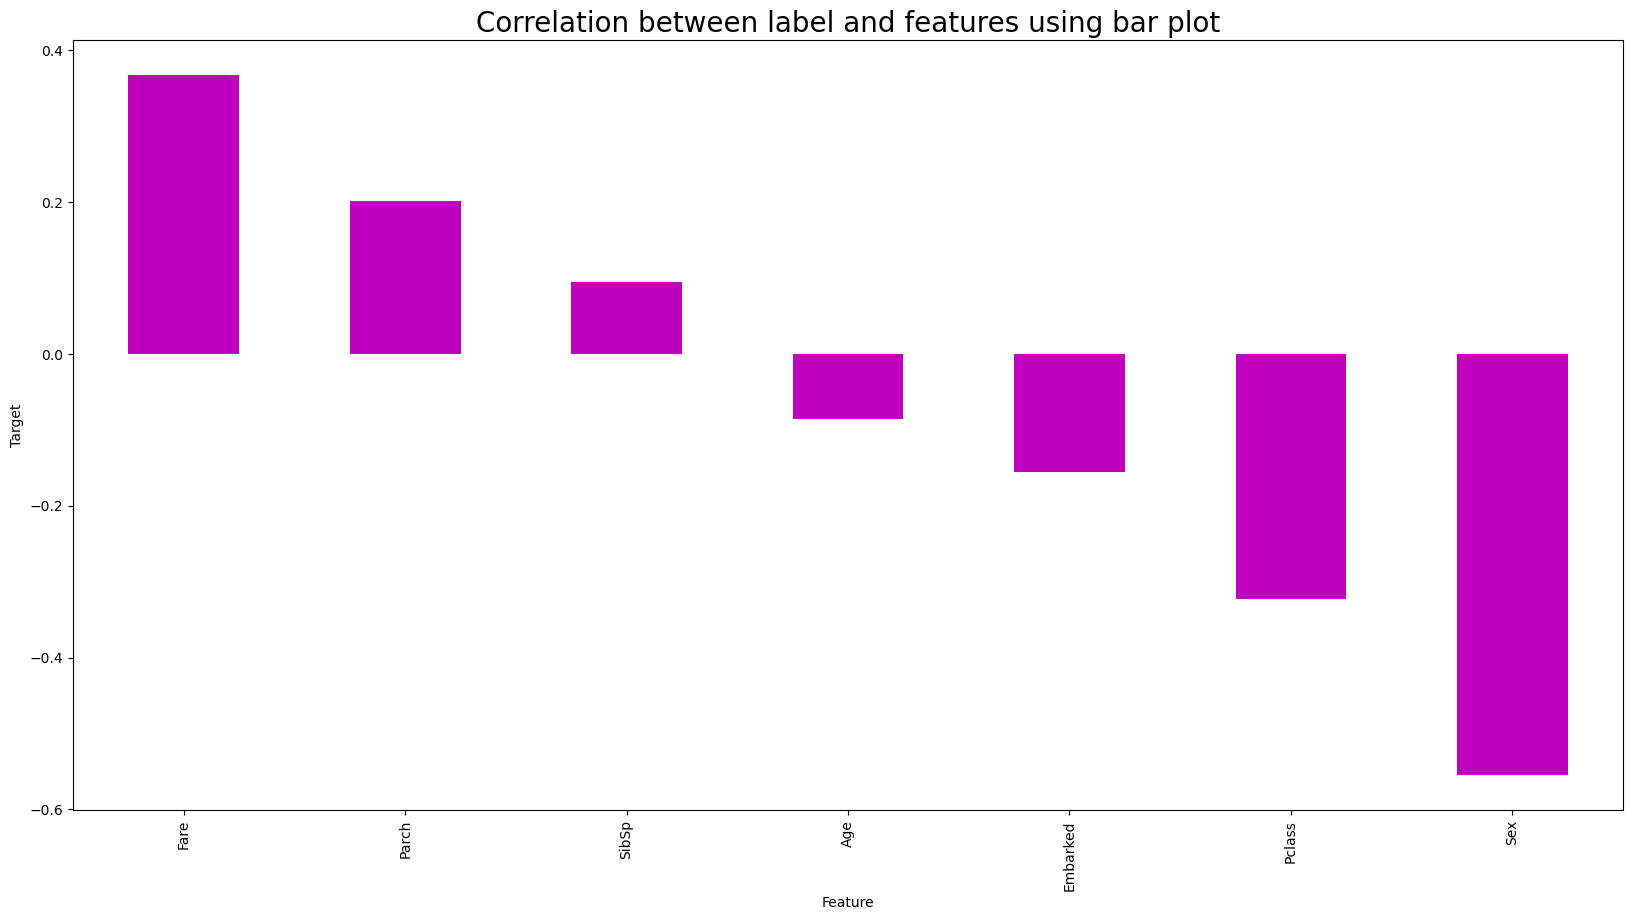

In [38]:
# Visualizing correlation between label and features using bar plot.
plt.figure(figsize=(20, 10))
df.corr()['Survived'].sort_values(ascending = False).drop(['Survived']).plot(kind = 'bar', color = 'm')
plt.xlabel('Feature', fontsize = 10)
plt.ylabel('Target', fontsize = 10)
plt.title("Correlation between label and features using bar plot", fontsize = 20)
plt.show()

# Feature Scaling Using Standard Standardization

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.833995,0.722036,-0.611926,1.051956,-0.451141,-0.839435,0.583162
1,-1.586804,-1.384973,0.703210,1.051956,-0.451141,1.584199,-1.953669
2,0.833995,-1.384973,-0.283142,-0.563407,-0.451141,-0.751615,0.583162
3,-1.586804,-1.384973,0.456622,1.051956,-0.451141,1.260629,0.583162
4,0.833995,0.722036,0.456622,-0.563407,-0.451141,-0.736084,0.583162
...,...,...,...,...,...,...,...
815,-0.376405,0.722036,-0.200946,-0.563407,-0.451141,-0.248882,0.583162
816,-1.586804,-1.384973,-0.858515,-0.563407,-0.451141,0.638805,0.583162
817,0.833995,-1.384973,-0.118750,1.051956,3.088912,0.373752,0.583162
818,-1.586804,0.722036,-0.283142,-0.563407,-0.451141,0.638805,-1.953669


###  Checking Variance Inflation Factor

In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x, i) for i in range(x.shape[1])]
vif['Features'] = x.columns
vif

,VIF values,Features
0,2.294017,Pclass
1,1.138131,Sex
2,1.256237,Age
3,1.288351,SibSp
4,1.304499,Parch
5,2.657580,Fare
6,1.049153,Embarked


As all the vif values are less than 5 ,that means no multicollinearity issue.

# Oversampling 

In [41]:
SM = SMOTE()
x1, y1 = SM.fit_resample(x, y)

In [42]:
y.value_counts()

Survived
0    500
1    320
Name: count, dtype: int64

In [43]:
y1.value_counts()

Survived
0    500
1    500
Name: count, dtype: int64

As the class looks balanced now, lets start with the Model Building.

# Model Building

In [45]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(
    x, y, test_size=0.25, random_state=70)
 
xtrain.shape, xtest.shape

((615, 7), (205, 7))

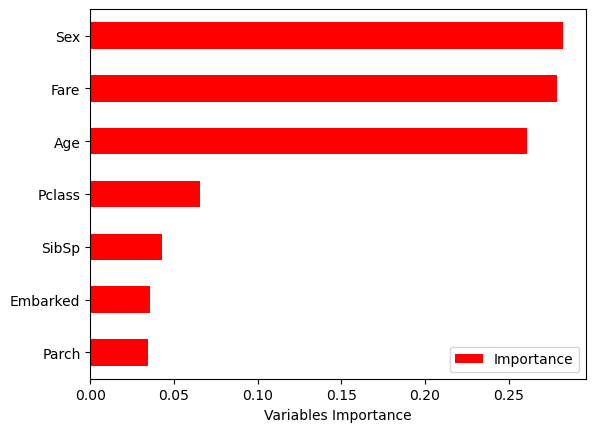

In [50]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_classifier.fit(xtrain, ytrain)

importance = pd.DataFrame({'Importance': rf_classifier.feature_importances_}, index=x.columns)
importance.sort_values('Importance', axis=0, ascending=True).plot(kind="barh", color="r")
plt.xlabel('Variables Importance')
plt.legend(loc="lower right")
plt.show()

We can see the Top features easily that are sex, Fare and Age.

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.25, random_state=70)


model = RandomForestClassifier(random_state=60)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.868
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.88      0.87       120
           1       0.89      0.85      0.87       130

    accuracy                           0.87       250
   macro avg       0.87      0.87      0.87       250
weighted avg       0.87      0.87      0.87       250



# Hyperparameter Tuning

In [56]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion' : ['gini', 'entropy'],
              'random_state' : [10, 50, 1000],
              'max_depth' : [0, 10, 20],
              'n_jobs' : [-2, -1, -1],
              'n_estimators' : [50, 100, 200, 300]}

In [57]:
GCV = GridSearchCV(RandomForestClassifier(), parameters, cv = 5)

In [58]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, -1],
                         'random_state': [10, 50, 1000]})

In [59]:
GCV.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'n_estimators': 100,
 'n_jobs': -2,
 'random_state': 50}

In [63]:
Final_model = RandomForestClassifier(criterion = 'entropy', max_depth = 10, n_estimators = 100, n_jobs = -2, random_state = 50)
Final_model.fit(x_train, y_train)
pred = Final_model.predict(x_test)
acc = accuracy_score(y_test, pred)
print(acc*100)

87.2


In [64]:
# Saving Model
import joblib
joblib.dump(Final_model, "Titanic_Dataset_Analysis.pkl")

['Titanic_Dataset_Analysis.pkl']

In [65]:
model = joblib.load("Titanic_Dataset_Analysis.pkl")
predictions = model.predict(x_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [66]:
a = np.array(y_test)
df = pd.DataFrame()
df['Predicted'] = predictions
df['Original'] = a
df

,Predicted,Original
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
245,1,1
246,1,1
247,0,0
248,1,1
